https://github.com/ki-ljl/FedProx-PyTorch

In [2]:
from dataset_create import Show_Info

show=Show_Info()

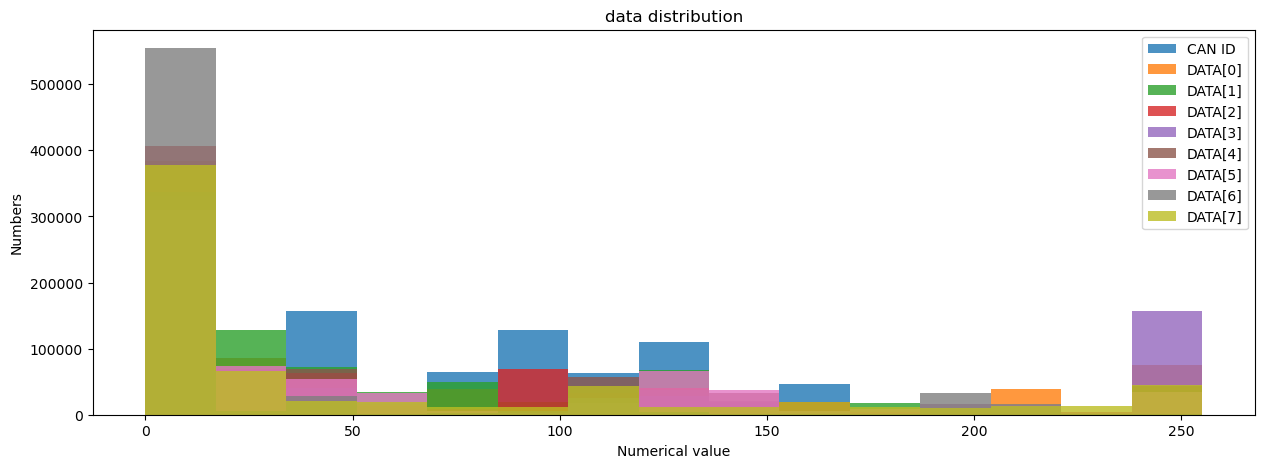

In [3]:
show.data_distribution(df, "data distribution")

In [1]:
from pretraining_model import My_Train
from model import CNN
from get_data import carHacking_Data
import torch

class Args:
    def __init__(self):
        self.B = 200
        self.root = '/home/raoxy/data/carhacking_our'
        self.optimizer = "adam"
        self.lr = 0.05
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.weight_decay = 0.0001
        self.E = 10
        self.gamma = 0.1
        self.step_size = 100


args = Args()
m = CNN(num_class=5).to(args.device)
m.name = "car_12"
Dtr, Dte, Val = carHacking_Data(file_name=m.name, args=args)

/home/raoxy/data/carhacking_our/car_12/train/
/home/raoxy/data/carhacking_our/car_12/test/
/home/raoxy/data/carhacking_our/car_12/verify/


In [2]:
optimizer = torch.optim.Adam(m.parameters(), lr=0.001)
pm = My_Train(args.device)

for epoch in range(args.E):
    pm.train(args.device,m, Dtr, optimizer, batch_size=args.B)
    pm.test(args.device,m, Dte, batch_size=args.B)

Train set: Average loss: 1.1735, Accuracy: 1858.0/2800 (70.13967535%)
Test set: Average loss: 0.6112, Accuracy: 872.0/1000 (99%)
Train set: Average loss: 0.3501, Accuracy: 2602.0/2800 (98.22574556%)
Test set: Average loss: 0.1312, Accuracy: 875.0/1000 (99%)
Train set: Average loss: 0.0865, Accuracy: 2629.0/2800 (99.24499811%)
Test set: Average loss: 0.0290, Accuracy: 879.0/1000 (100%)
Train set: Average loss: 0.0254, Accuracy: 2638.0/2800 (99.58474896%)
Test set: Average loss: 0.0114, Accuracy: 883.0/1000 (100%)
Train set: Average loss: 0.0134, Accuracy: 2643.0/2800 (99.77349943%)
Test set: Average loss: 0.0065, Accuracy: 883.0/1000 (100%)
Train set: Average loss: 0.0083, Accuracy: 2647.0/2800 (99.92449981%)
Test set: Average loss: 0.0061, Accuracy: 883.0/1000 (100%)
Train set: Average loss: 0.0073, Accuracy: 2645.0/2800 (99.84899962%)
Test set: Average loss: 0.0053, Accuracy: 883.0/1000 (100%)
Train set: Average loss: 0.0057, Accuracy: 2647.0/2800 (99.92449981%)
Test set: Average loss

In [ ]:
import numpy as np

# 类别比例
proportions = a

# 计算Gini指数
def gini_index(c):
    """计算Gini指数"""
    # 计算累积比例
    c_sorted = np.sort(c)[::-1]
    # 计算洛伦兹曲线的下方面积与对角线面积之差
    j = np.arange(len(c_sorted))
    area = (np.pi * (j + 0.5) * (2 * c_sorted - j - 1) / 2).sum()
    # Gini指数是这个差值与1的一半
    gini = (1 - area) / 2
    return gini

# 计算并打印Gini指数
gini = gini_index(proportions)
print(f"Gini指数: {gini}")

# EMD介绍

https://blog.csdn.net/qq_38130747/article/details/135057322

wasserstein_distance
所属模块：scipy

功能：衡量两个分布之间的相似性

In [4]:
# 实例1：计算EMD距离值

from scipy.stats import wasserstein_distance
x0 = wasserstein_distance([0, 1, 3], [0, 1, 3])#相同的分布，分布的差异为0
x1 = wasserstein_distance([3, 1, 0], [0, 1, 3])#相同分布，但元素顺序打乱，分布的差异值仍然为0
x2 = wasserstein_distance([0, 1, 2], [0, 1, 3])#分布中只有部分值相同，分布的差异值仍然为0.3
x3 = wasserstein_distance([4, 5, 6], [0, 1, 3])#分布完全不同，分布的差异值为3.6
print("x0 = ",x0)
print("x1 = ",x1)
print("x2 = ",x2)
print("x3 = ",x3)

x0 =  0.0
x1 =  0.0
x2 =  0.33333333333333337
x3 =  3.6666666666666665


函数说明
```
scipy.stats.wasserstein_distance(u_values, v_values, u_weights=None, v_weights=None)
```
返回值说明 ``返回一个浮点数float，返回值越大，两个分布的距离差别越大``

In [ ]:
实例2:分布中每个点的权重不同

#code-python(3.6)
from scipy.stats import wasserstein_distance
x = wasserstein_distance([3.4, 3.9, 7.5, 7.8], [4.5, 1.4],[1.4, 0.9, 3.1, 7.2], [3.2, 3.5])
#分布1是[3.4, 3.9, 7.5, 7.8]，每个点的权重是[1.4, 0.9, 3.1, 7.2]；
#分布2是[4.5, 1.4]，每个点的权重是[3.2, 3.5]；
print("x = ",x)

In [3]:
from scipy.stats import wasserstein_distance
# 对权重未归一化
wd1 = wasserstein_distance([0,1,2,3],[0,1,2,3], [4,2,1,3],[3,1,2,4])
# wd1 = 0.4
# 前面两个u_values,v_value值不同
wd2 = wasserstein_distance([1,2,3,4],[1,2,3,4], [4,2,1,3],[3,1,2,4])
# wd2 = 0.4
# u_values,v_value 值变化
wd3 = wasserstein_distance([0,1,3,4],[0,1,3,4], [4,2,1,3],[3,1,2,4])
# wd3 = 0.6
# 对示例中的进行归一化处理
wd4 = wasserstein_distance([0,1,2,3],[0,1,2,3], [4/10,2/10,1/10,3/10],[3/10,1/10,2/10,4/10])
# wd4 = 0.4

In [5]:
wd1,wd2,wd3,wd4

(0.39999999999999997,
 0.39999999999999997,
 0.5999999999999999,
 0.4000000000000001)

# 用EMD衡量全局模型和局部模型的距离

In [10]:
from pretraining_model import My_Train
from model import CNN
from get_data import carHacking_Data
import torch

class Args:
    def __init__(self):
        self.B = 200
        self.root = '/home/raoxy/data/carhacking_dirichlet_05/'
        self.optimizer = "adam"
        self.lr = 0.05
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.weight_decay = 0.0001
        self.E = 1
        self.gamma = 0.1
        self.step_size = 100


args = Args()
m_global = CNN(num_class=5,name="car_11").to(args.device)
m_car1 = CNN(num_class=5,name="car_1").to(args.device)
m_global.load_state_dict(torch.load('model/CNN.pth'))
m_car1.load_state_dict(torch.load('model/car_1.pth'))
# Dtr, Dte = carHacking_Data(file_name=m.name, args=args)

<All keys matched successfully>

In [ ]:
wasserstein_distance([0,1,2,3],[0,1,2,3],m_global.parameters()[0],m_car1.parameters()[0])

In [5]:
optimizer = torch.optim.Adam(m.parameters(), lr=0.001)
pm = My_Train(args.device)

for epoch in range(args.E):
    pm.train(args.device,m, Dtr, optimizer, batch_size=args.B)
#     pm.test(args.device,m, Dte, batch_size=args.B)

Train set: Average loss: 1.6477, Accuracy: 33.0/200 (17.36842105%)


## 封装的函数

In [63]:
import matplotlib.pyplot as plt
import torch
from scipy.stats import wasserstein_distance

# 加载模型权重
def load_model_weights(model_path):
    return torch.load(model_path)

# 计算两个张量之间的EMD距离
def calculate_emd_distance(tensor_a, tensor_b):
    # 将张量移动到CPU并展平
    from scipy.stats import wasserstein_distance
    flattened_a = tensor_a.view(-1).cpu().detach().numpy()
    flattened_b = tensor_b.view(-1).cpu().detach().numpy()

    # 计算EMD距离
    emd = wasserstein_distance(flattened_a, flattened_b)
    return torch.tensor(emd)
def get_emd(model_path_2):
    # 加载模型权重
    model_path_1 = '/home/raoxy/experimental_result/EMD/CNN/pth/CNN.pth'#'/home/raoxy/FedAvg_BT/model/CNN.pth'
    weights_1 = load_model_weights(model_path_1)
    weights_2 = load_model_weights(model_path_2)

    ed=[]
    # 假设我们比较第一层的权重
    for layer_name in weights_1.keys():
        emd_distance = calculate_emd_distance(weights_1[layer_name], weights_2[layer_name])
        ed.append(emd_distance.item())
#         print(f'{layer_name} EMD距离为: {emd_distance}')
    return ed

data={}
for i in range(10):
    data["RSU "+str(i+1)]=get_emd('/home/raoxy/experimental_result/EMD/CNN/pth/car_'+str(i+1)+'.pth')
#     data["RSU "+str(i)]=get_emd('/home/raoxy/FedAvg_BT/model/car_'+str(i+1)+'.pth')

In [66]:
import pandas as pd

df=pd.DataFrame(data).T

In [67]:
df

,0,1,2,3,4,5
RSU 1,0.013204,0.024864,0.014261,0.038344,0.025884,0.037966
RSU 2,0.038707,0.031594,0.005832,0.018213,0.053165,0.064348
RSU 3,0.007353,0.014672,0.017664,0.040691,0.022255,0.032887
RSU 4,0.011577,0.012721,0.010425,0.031369,0.015554,0.024890
RSU 5,0.012873,0.015132,0.006914,0.027574,0.020032,0.047070
RSU 6,0.011683,0.009442,0.015477,0.027346,0.019309,0.039436
RSU 7,0.012853,0.030897,0.010890,0.024771,0.034343,0.029042
RSU 8,0.011475,0.028133,0.008419,0.042058,0.025434,0.070864
RSU 9,0.014032,0.038298,0.011532,0.039095,0.022280,0.024812
RSU 10,0.013808,0.027839,0.018982,0.026029,0.029523,0.031530


In [68]:
df.columns=['block1.w', 'block1.b', 'block2.w', 'block2.b', 'block3.w', 'block3.b']
# df.columns=['block1', 'block2', 'block3', 'block4']

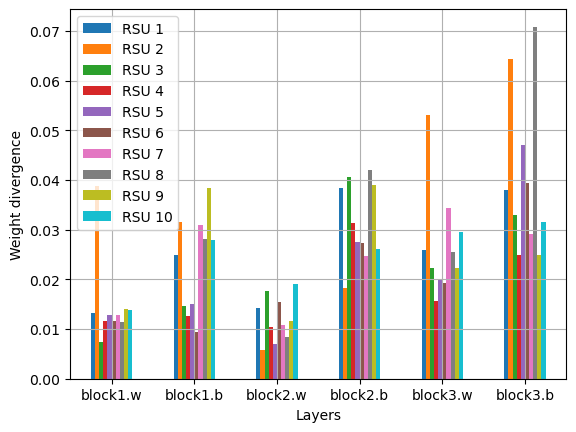

In [69]:
df.T.plot(kind="bar")
plt.xticks(rotation=360)
plt.xlabel('Layers')
plt.ylabel('Weight divergence')
plt.grid()

## 分析

In [30]:
def FedProx():
    weights_1 = load_model_weights('model/CNN.pth')
    weights_2 = load_model_weights('model/car_1.pth')
    for layer_name in weights_1.keys():
        w = weights_2[layer_name]
        w_t = weights_1[layer_name] 
        print((w - w_t).norm(2)) 
FedProx()

tensor(0.0159, device='cuda:0')
tensor(0.0013, device='cuda:0')
tensor(0.0108, device='cuda:0')
tensor(4.7750e-05, device='cuda:0')
tensor(0.0041, device='cuda:0')
tensor(4.5048e-05, device='cuda:0')


In [35]:
def FedCan():
    weights_1 = load_model_weights('model/CNN.pth')
    weights_2 = load_model_weights('model/car_1.pth')
    for layer_name in weights_1.keys():
        w = weights_2[layer_name]
        w_t = weights_1[layer_name] 
        print(calculate_emd_distance(w, w_t).to('cuda')) 
FedCan()

tensor(8.4334e-05, device='cuda:0', dtype=torch.float64)
tensor(0.0001, device='cuda:0', dtype=torch.float64)
tensor(8.2193e-06, device='cuda:0', dtype=torch.float64)
tensor(6.5783e-06, device='cuda:0', dtype=torch.float64)
tensor(0.0002, device='cuda:0', dtype=torch.float64)
tensor(1.6423e-05, device='cuda:0', dtype=torch.float64)
